# Capstone Webscrapping using BeautifulSoup

This notebook contains step by step of Webscrapping using BeautifulSoup, then will used to build dashboard using flask

## background

The site used is https://www.exchange-rates.org/history/IDR/USD/T and will get `Date`, `Day`, and `USD Price` 

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')


To visualize what exactly you get from the `request.get`, we can use `.content` to see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [85]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [2]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
soup

<!DOCTYPE html>

<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang="en"><!--<![endif]-->
<head>
<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
<meta charset="utf-8"><meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<base href="https://www.exchange-rates.org/"/>
<meta content="View a table of historical Indonesian Rupiah exchange rates against the US Dollar.  You may also export this information to Excel or another spreadsheet program." name="description"/>
<meta content="Indonesian Rupiah, historical exchange rates, US Dollar" name="keywords"/>
<meta content="Affinity" name="mapping"/>
<link href="https://www.exchange-rates.org/history/IDR/USD/T" rel="canonical"/>
<link href="https://d1drv07xrq

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. in this step we will find `table` part with `class : table table-striped table-hover table-hover-solid-row table-simple history-data` for unique id 

In [3]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:200])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    1/5/2022
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/


Finding `row length` is used to scrapping proces to iterate all of data in table. this step use `find_all` from tag `td` to get each value in table

In [4]:
row = table.find_all('td')
row_length = len(row)
row_length

516

Do the scrapping process here

first we can show what table found using `find_all('td')`

In [89]:
row

[<td>1/4/2022</td>,
 <td>Tuesday</td>,
 <td><a href="/Rate/USD/IDR/1-4-2022">14,306.22137</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/1-4-2022">USD IDR rate for 1/4/2022</a></td>,
 <td>1/3/2022</td>,
 <td>Monday</td>,
 <td><a href="/Rate/USD/IDR/1-3-2022">14,271.10676</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/1-3-2022">USD IDR rate for 1/3/2022</a></td>,
 <td>12/31/2021</td>,
 <td>Friday</td>,
 <td><a href="/Rate/USD/IDR/12-31-2021">14,184.77099</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/12-31-2021">USD IDR rate for 12/31/2021</a></td>,
 <td>12/30/2021</td>,
 <td>Thursday</td>,
 <td><a href="/Rate/USD/IDR/12-30-2021">14,249.76380</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/12-30-2021">USD IDR rate for 12/30/2021</a></td>,
 <td>12/29/2021</td>,
 <td>Wednesday</td>,
 <td><a href="/Rate/USD/IDR/12-29-2021">14,198.28676</a> IDR</td>,
 <td class="text-narrow-scr

next we can iterate each row and save it to array based on pattern of table

In [5]:
date_temp = []
day_temp = []
price_temp = []

for i in range(0, row_length):

    #scrapping process
    if i in range(0, row_length, 4):
        date_temp.append(row[i].get_text())
    if i in range(1, row_length, 4):
        day_temp.append(row[i].get_text())
    if i in range(2, row_length, 4):
        price_temp.append(row[i].get_text())

## Creating data frame & Data wrangling

Put the array into dataframe

In [8]:
import pandas as pd

df = pd.DataFrame()
df['Date'] = date_temp
df['Day'] = day_temp
df['Price'] = price_temp
df.head()
# df = pd.DataFrame((date_temp, day_temp, price_temp), columns = ('Date','Day','Price'))

,Date,Day,Price
0,1/5/2022,Wednesday,"14,376.59427 IDR"
1,1/4/2022,Tuesday,"14,306.22137 IDR"
2,1/3/2022,Monday,"14,271.10676 IDR"
3,12/31/2021,Friday,"14,184.77099 IDR"
4,12/30/2021,Thursday,"14,249.76380 IDR"


Do the data cleaning, convert type of `Date` column into right type `datetime64`

In [13]:
df['Date'] = df['Date'].astype('datetime64')
df.head()

,Date,Day,Price
0,2022-01-05,Wednesday,14376.59427
1,2022-01-04,Tuesday,14306.22137
2,2022-01-03,Monday,14271.10676
3,2021-12-31,Friday,14184.77099
4,2021-12-30,Thursday,14249.76380


Next we should remove `IDR` and `,` from each row in column `Price` and convert into `float`

In [9]:
df['Price'] = df['Price'].apply(lambda x: x.replace('IDR', ''))
df['Price'] = df['Price'].apply(lambda x: x.replace(',', ''))
df['Price'] = df['Price'].astype('float')
df.head()

,Date,Day,Price
0,1/5/2022,Wednesday,14376.59427
1,1/4/2022,Tuesday,14306.22137
2,1/3/2022,Monday,14271.10676
3,12/31/2021,Friday,14184.77099
4,12/30/2021,Thursday,14249.76380


Set `Date` column as index, then add some missing date using **Padding** `pd.date_range(start="2018-01-01", end="2018-03-31")` and then use `reindex`

first get start and end date using `describe`

In [12]:
df['Date']

0        1/5/2022
1        1/4/2022
2        1/3/2022
3      12/31/2021
4      12/30/2021
          ...    
124     7/15/2021
125     7/14/2021
126     7/13/2021
127     7/12/2021
128      7/9/2021
Name: Date, Length: 129, dtype: object

In [39]:
start = min(df['Date'])
end = max(df['Date'])
print(start, end)

2021-07-09 00:00:00 2022-01-05 00:00:00


In [99]:
quarter = pd.date_range(start=start, end=end)
quarter

DatetimeIndex(['2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15',
               '2021-07-16', '2021-07-17',
               ...
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31', '2022-01-01', '2022-01-02',
               '2022-01-03', '2022-01-04'],
              dtype='datetime64[ns]', length=181, freq='D')

set `Date` as index, then reindex using `quarter`

In [100]:
df = df.set_index('Date')
df = df.reindex(quarter)
df

,Day,Price
2021-07-08,Thursday,14515.87714
2021-07-09,Friday,14499.31330
2021-07-10,NaN,NaN
2021-07-11,NaN,NaN
2021-07-12,Monday,14491.59294
...,...,...
2021-12-31,Friday,14184.77099
2022-01-01,NaN,NaN
2022-01-02,NaN,NaN
2022-01-03,Monday,14271.10676


Handling missing value from `Price` column using `ffill` and `Day` column using `dt.day_name()`

In [101]:
df['Price'] = df['Price'].fillna(method='ffill')
df.head()

,Day,Price
2021-07-08,Thursday,14515.87714
2021-07-09,Friday,14499.31330
2021-07-10,NaN,14499.31330
2021-07-11,NaN,14499.31330
2021-07-12,Monday,14491.59294


In [102]:
df = df.reset_index().rename(columns={'index':'Date'})
df.head()

,Date,Day,Price
0,2021-07-08,Thursday,14515.87714
1,2021-07-09,Friday,14499.31330
2,2021-07-10,NaN,14499.31330
3,2021-07-11,NaN,14499.31330
4,2021-07-12,Monday,14491.59294


In [38]:
card_data = f'{df["Price"][0].round(2)}' #be careful with the " and ' 
card_data = format(float(card_data), ',')
card_data

'14,376.59'

In [15]:
df['Date'] = df['Date'].astype('datetime64')
df['Day'] = df['Date'].dt.day_name()
df.head()

,Date,Day,Price
0,2022-01-05,Wednesday,14376.59427
1,2022-01-04,Tuesday,14306.22137
2,2022-01-03,Monday,14271.10676
3,2021-12-31,Friday,14184.77099
4,2021-12-30,Thursday,14249.76380


Data visualisation, we can use line plot to show daily price movement of USD-Indonesia

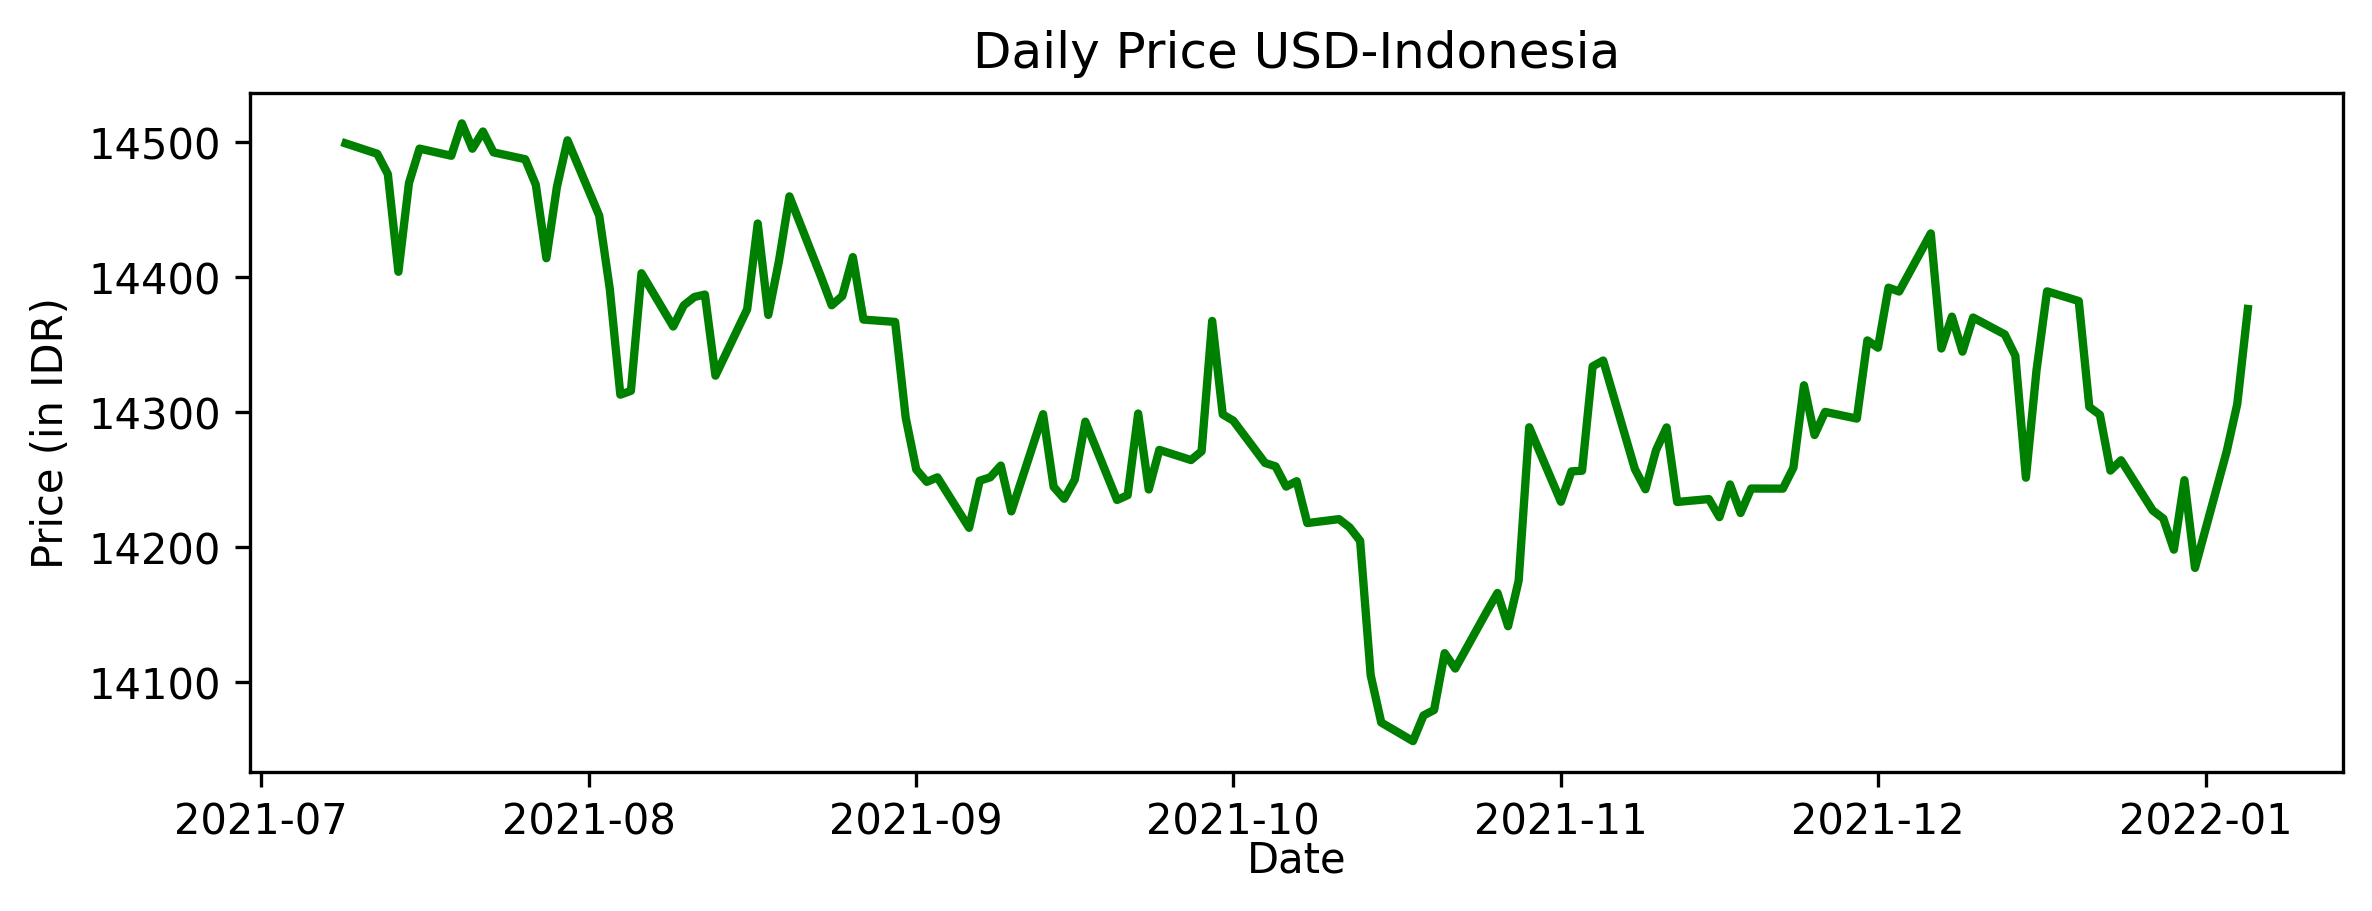

In [26]:
import matplotlib.pyplot as plt

x = df['Date'].values
y = df['Price'].values

fig = plt.figure(figsize=(9,3),dpi=300)
fig.add_subplot()
plt.title('Daily Price USD-Indonesia')
plt.xlabel('Date')
plt.ylabel('Price (in IDR)')
plt.plot(x, y, color='green', linewidth=2)
plt.show()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.